# MTpy Example 05

## Depth of Investigation

To get a better idea of depth of investigation we can use the Niblett-Bostick tranformation.  This is a 1D transformation of apparent resistivity to depth.

depth $= \sqrt(\dfrac{\rho_a \cdot T}{2 \cdot \pi \cdot \mu_0})$ in meters.  

Where:

  - $\rho_a$ is the apparent resistivity in $\Omega \cdot m$
  - $T$ is period in seconds
  - $\mu_0$ is the permitivity of free space

In [1]:
from pathlib import Path
from mtpy import MTCollection
%matplotlib widget

2022-10-15 10:19:41,262 [line 135] error.get_mtpy_logger - INFO: Logging file can be found C:\Users\jpeacock\OneDrive - DOI\Documents\GitHub\mtpy\logs\mtpy_error.log
2022-10-15 10:19:41,278 [line 135] matplotlib.get_mtpy_logger - INFO: Logging file can be found C:\Users\jpeacock\OneDrive - DOI\Documents\GitHub\mtpy\logs\matplotlib_warn.log
2022-10-15 10:19:46,669 [line 135] mth5.setup_logger - INFO: Logging file can be found C:\Users\jpeacock\OneDrive - DOI\Documents\GitHub\mth5\logs\mth5_debug.log


### Open MTCollection

In the previous example we created a MTH5 file from existing Yellowstone data.  Let's open that file here for plotting.

In [2]:
mc = MTCollection()
mc.open_collection(Path().cwd().parent.parent.joinpath("data", "transfer_functions", "yellowstone_mt_collection.h5"))

## Plot 1D Depth of Investigation

We can plot the depth of investigation for a single station, which provides the depth estimates for the TE, TM, and Determinant of the impedance tensor.  The Niblett-Bostick method in `mtpy.analysis.niblettbostick.calculate_depth_of_investigation` rotates the data according to 2D strike estimation to get the data into a geoelectric coordinate system so that TE and TM modes are properly represented.  The determinant provides a general guideline to the depth of investigation.  

The plot is on a log-log scale with the y-axis being period from short periods at the top (shallow) and long periods at the bottom (deep).  The x-axis represents the depth of investigation for the given mode.  

  - **TE Mode**: is parallel to geoelectric strike (the more conductive mode) which allows electrical currents to flow well, but also causes them to decay more quickly.  Thus the penetration depth is often shallower than the TM mode.  In this case almost by an order of magnitude.  
  - **TM Mode**: perpendicular to geoelectric strike and thus more resistive.  This allows impinging magnetic fields to penetrate deeper, as seen here
  - **Determinant**: provides a good 1D approximation for the depth of penetration that incorporates all modes.  

2022-10-15 10:19:46,986 [line 275] mtpy.core.mt_collection.MTCollection.get_tf - WARNING: Found multiple transfer functions with ID YNP31B. Suggest setting survey, otherwise returning the TF from survey YSBB.


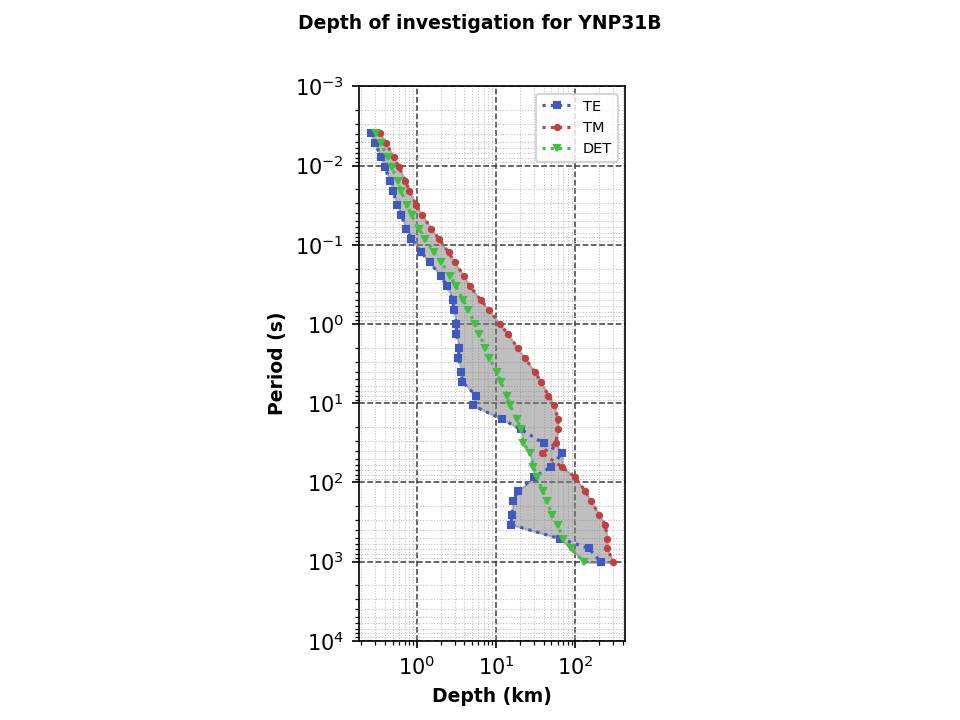

In [3]:
plot_doi_ynp31 = mc.plot_penetration_depth_1d("YNP31B", fig_num=1) 

### Long Period Depth of Investigation

For comparison lets plot the depth of investigation for the near by long period site "WYYS2".

From the broadband station above, at 1,000 seconds the depth of penetration is about 70 km.  The long period station below is showing a depth of penetration of about 300 km for a period of 15,000 seconds.  Note that this is not only the depth of investigation but also the radius of influence at the given period.  

This also provides a good example of what type of instrument to use depending on your target.  Broadband or wideband instruments usually record over the coarse of 1-3 days depending on logistics, solar activity, and desired periods.  Long period instruments on the other hand usually need 2 to 3 weeks to record to get the long periods but they do not record periods shorter than 1 second.  In an ideal world if you are doing a regional survey you would collect long period data every 30 km or so and fill in with broadband data every 2-10 km.  

2022-10-15 10:19:49,537 [line 275] mtpy.core.mt_collection.MTCollection.get_tf - WARNING: Found multiple transfer functions with ID WYYS2. Suggest setting survey, otherwise returning the TF from survey Transportable_Array.


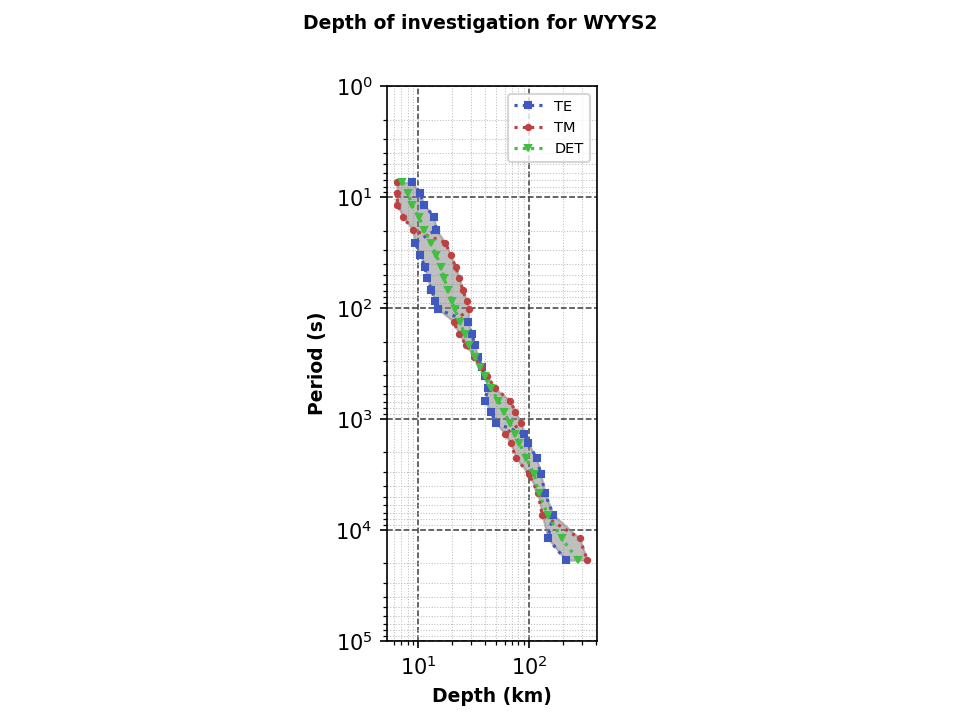

In [4]:
plot_doi_wyys2 = mc.plot_penetration_depth_1d("WYYS2", fig_num=2)

## Plot Depth of Investigation Maps

Plotting a single station is nice, but sometimes a map view provides a better spatial representation.  Here lets plot all the stations. Its quicker in the notebooks if we create a `mt_data` (dictionary of transfer function objects `mtpy.core.MT`) and then use that as input for plotting.  Otherwise if you rerun the plotting code without the input it will pull the `mt_data` each time and that is slow. 

In [5]:
%%time
mt_data = mc.to_mt_data()

Wall time: 3min 17s


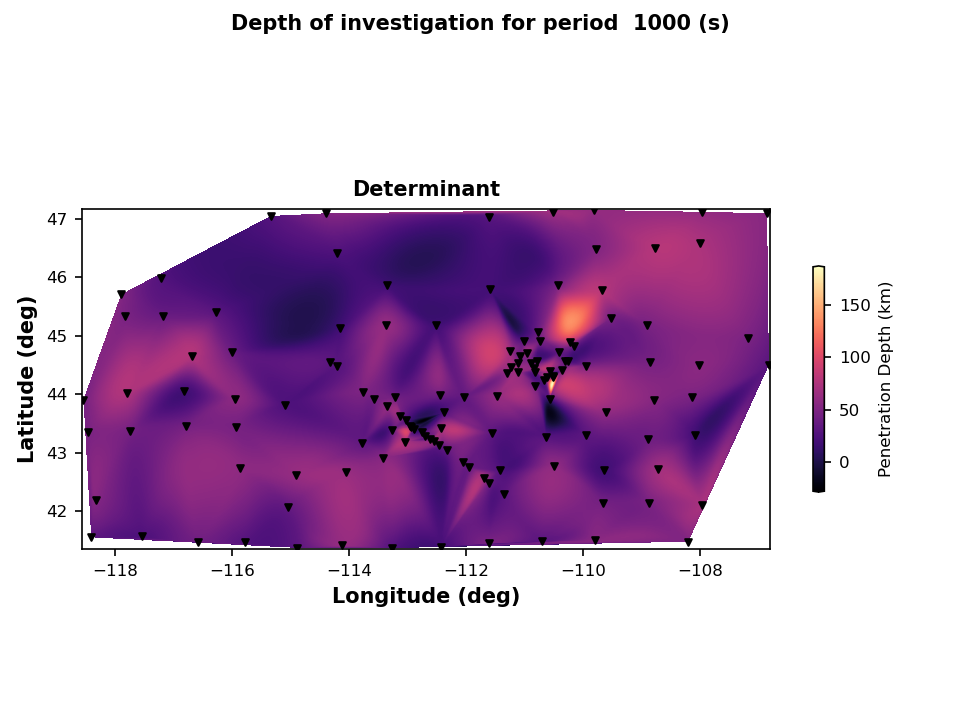

In [10]:
plot_doi_map = mt_data.plot_penetration_depth_map(plot_period = 1000, interpolation_method="cubic", fig_num=3, plot_te=False, plot_tm=False)

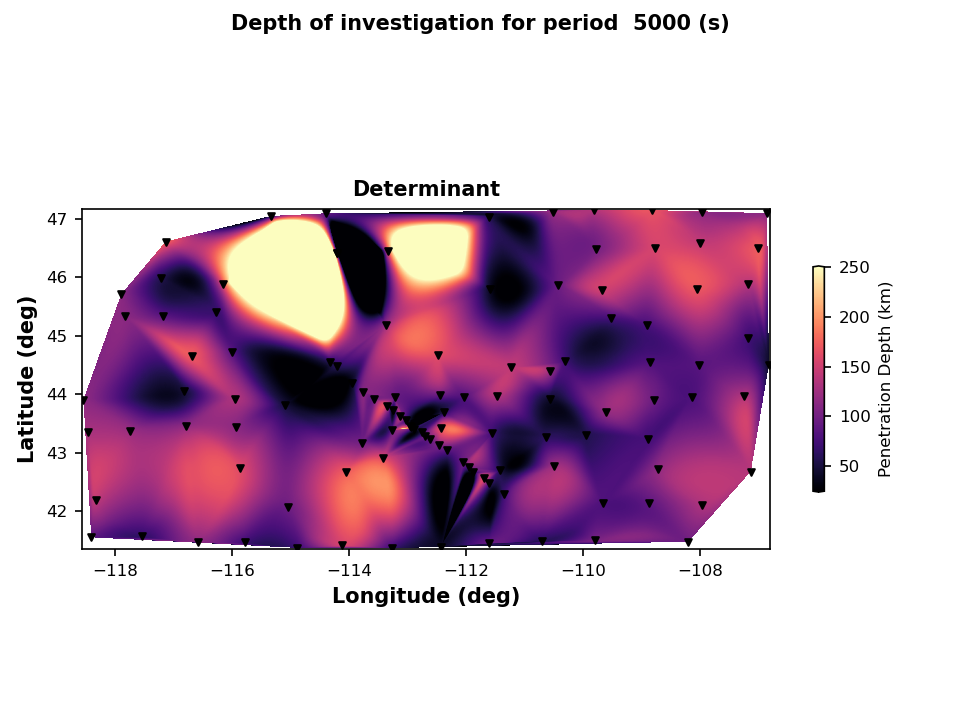

In [14]:
plot_doi_map.plot_period = 5000
plot_doi_map.fig_num = 4
plot_doi_map.depth_range = (25,250)
plot_doi_map.redraw_plot()

Wall time: 565 ms


C:\Users\jpeacock\OneDrive - DOI\Documents\GitHub\mtpy\mtpy\imaging\plot_penetration_depth_map.py:277: UserWarning: The following kwargs were not used by contour: 'mask'
  im = ax.tricontourf(


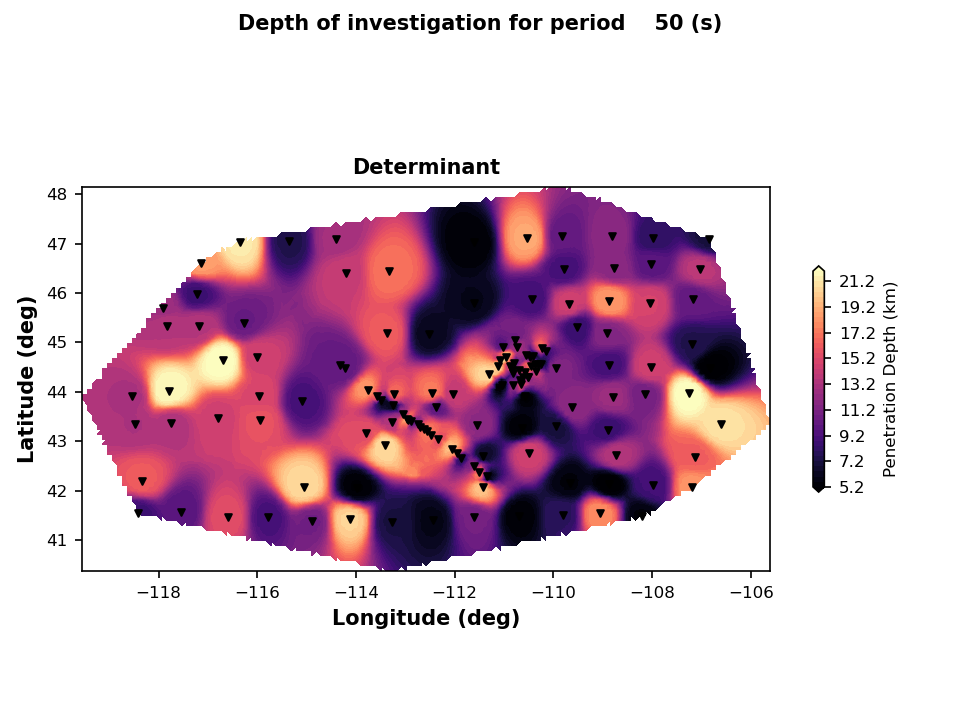

In [8]:
%%time
plot_doi_map.plot_period = 50
plot_doi_map.fig_num = 5
plot_doi_map.cell_size = .1
plot_doi_map.interpolation_method = "delaunay"
plot_doi_map.redraw_plot()

In [9]:
mc.close_collection()

2022-10-15 10:23:52,046 [line 753] mth5.mth5.MTH5.close_mth5 - INFO: Flushing and closing C:\Users\jpeacock\OneDrive - DOI\Documents\GitHub\mt_examples\data\transfer_functions\yellowstone_mt_collection.h5
